<a href="https://colab.research.google.com/github/MatheusRangelCardoso/tcc-bi-master-2019.1/blob/main/TCC_Energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
import os

# Carregar dados Energia:

In [ ]:
drive.mount('/content/drive')
workdir_path = '/content/drive/My Drive/TCC' #Caminho para o workspace
os.chdir(workdir_path)

Mounted at /content/drive


In [ ]:
df_energia = pd.read_csv("energy_dataset.csv",               #Carregar o Arquivo
                         parse_dates=["time"],               #Utilziar a coluna "time" como tipo "data/hora"
                         infer_datetime_format=True,)        #Inferir o o tipo de dados "data/hora" no dataframe
df_energia.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [ ]:
# Linhas e Colunas
df_energia.shape

(35064, 29)

## Verificar o tipo dos dados:

In [ ]:
# Tipo de dados
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

# Registros Duplicados:

In [ ]:
sum(df_energia.duplicated())

0

## Estatísticas Básicas:

In [ ]:
df_energia.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,35045.000000,35045.000000,35046.000000,35045.0,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,475.577343,972.116108,2605.114735,0.0,6263.907039,60.228585,85.639702,1432.665925,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,792.406614,400.777536,1835.199745,0.0,839.667958,20.238381,14.077554,1680.119887,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,0.000000,637.000000,1077.250000,0.0,5760.000000,53.000000,73.000000,71.000000,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,68.000000,906.000000,2164.000000,0.0,6566.000000,57.000000,88.000000,616.000000,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,616.000000,1250.000000,3757.000000,0.0,7025.000000,80.000000,97.000000,2578.000000,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,4523.000000,2000.000000,9728.000000,0.0,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


**Conclusões:**
<br>
Colunas que só apresentam valor "0" ou nulo "NaN" deverão ser removidas. Visto que não poderão ser utilizadas para a construção do modelo pois elas não carregam em sí nenhuma informação.
<br>
<br>
Colunas:
<br>
1 - generation fossil coal-derived gas
<br>
2 - generation fossil oil shale
<br>
3 - generation fossil peat
<br>
4 - generation geothermal
<br>
5 - generation hydro pumped storage aggregated
<br>
6 - generation marine
<br>
7 - generation wind offshore
<br>
<br>
Colunas que contém a previsão de consumo um dia a frente não serão utilizadas para a construção do modelo. Pois é uma "previsão" e não sabemos como esses valores foram inferidos. É mais seguro utilizarmos dados históricos para a construção do modelo.
<br>
<br>
Colunas:
<br>
8 - forecast solar day ahead
<br>
9 - forecast wind offshore eday ahead
<br>
10 - forecast wind onshore day ahead
<br>
11 - total load forecast

In [ ]:
df_energia = df_energia.drop(["generation fossil coal-derived gas",
                             "generation fossil oil shale",
                             "generation fossil peat",
                             "generation geothermal",
                             "generation hydro pumped storage aggregated",
                             "generation marine",
                             "generation wind offshore",
                             "forecast solar day ahead",
                             "forecast wind offshore eday ahead",
                             "forecast wind onshore day ahead",
                             "total load forecast"],
                             axis = 1)

df_energia.shape

(35064, 18)

## Registros Nulos
<br>
Lidando com regitros nulos em séries temporais:
<br>
<br>
Quando um registro nulo é encontrado em uma série temporal, não é recomendado substituir o valor pela média ou pela mediana. Pois isto poderia causar um viés nos dados visto que uma série temporal, os dados foram retirados em um intervalo de tempo pré determinado (no caso deste conjunto de dados, o intervalo ocorre de 1 em 1 hora). Desta forma substituir o valor pela média ou excluir completamente alinha é inviável. E excluir completamente a coluna também pois todas as variáveis apresentam um dado faltante.


In [ ]:
df_energia.isnull().sum()

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64

**Conclusões:**
<br>
Há registros nulos nos dados. A base de dados contém 35064 registros e a coluna que contém maior registros nulos "total load actual" contém 36 registros nulos (cerca de 0,001% [36/35064] de registros). Desta maneira, será reaizada uma análisa para verificar o que fazer com os registros nulos.
<br>
<br>
A coluna "price actual" que é a "target variable" não apresenta nenhum registro nulo. O que é bom, pois evitaria a necessidade de excluir um registro do conjunto de dados (eliminando uma observação do intervalo de tempo do conjunto) ou evitaria a necessidade de uma criação de uma variável sintética para um determinado intervalo de tempo (o que poderia prejudicar a capacidade preditiva do modelo)


In [ ]:
df_energia[df_energia["total load actual"].isnull()]

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
108,2015-01-05 12:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.50,79.14
109,2015-01-05 13:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.80,73.95
110,2015-01-05 14:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.50,71.93
111,2015-01-05 15:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,71.50
112,2015-01-05 16:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,71.85
113,2015-01-05 17:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.60,80.53
661,2015-01-28 13:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00,77.62
751,2015-02-01 07:00:00+01:00,449.0,312.0,4765.0,5269.0,222.0,480.0,980.0,1174.0,7101.0,44.0,75.0,48.0,208.0,3289.0,NaN,56.10,16.98
752,2015-02-01 08:00:00+01:00,453.0,312.0,4938.0,5652.0,288.0,0.0,1031.0,3229.0,7099.0,44.0,75.0,73.0,207.0,3102.0,NaN,57.69,19.56
753,2015-02-01 09:00:00+01:00,452.0,302.0,4997.0,5770.0,296.0,0.0,1083.0,4574.0,7097.0,43.0,71.0,809.0,204.0,2838.0,NaN,60.01,23.13


# Verificar o comportamento dos registros nulos.

Será avaliado o comportameto dos rgistros nulos resente na coluna "total load actual", pois esta coluna contém o maior número de registros nulos.
<br>
<br>
Será realizada uma analise em três intervalos:
<br>
1) do registro 0 ao registro 120
<br>
2) do registro 80 ao registro 120
<br>
3) do registro 650 ao 780

In [ ]:
# Do Registro 0 ao refistro 120
df_nulos_0 = df_energia [0:121]

# Do registro 80 ao registro 120
df_nulos_1 = df_energia[80:121]

# Do registro 650 ao registro 780
df_nulos_2 = df_energia[650:781]

# Realizar Interpolção

In [ ]:
#Criando uma cópia do dataframe
df_energia_interpolacao=df_energia

In [ ]:
# Realizando a interpolação na cópia acima
df_energia_interpolacao.interpolate(method='linear',
                                    limit_direction='forward',
                                    inplace=True,
                                    axis=0)

In [ ]:
# Segmentando o dtatrarama nos mesmos intervalos para realizar a comparação
df_int_0 = df_energia_interpolacao [0:121]
df_int_1 = df_energia_interpolacao[80:121]
df_int_2 = df_energia_interpolacao[650:781]

# Comparando Interpolação de 0 a 120 registros

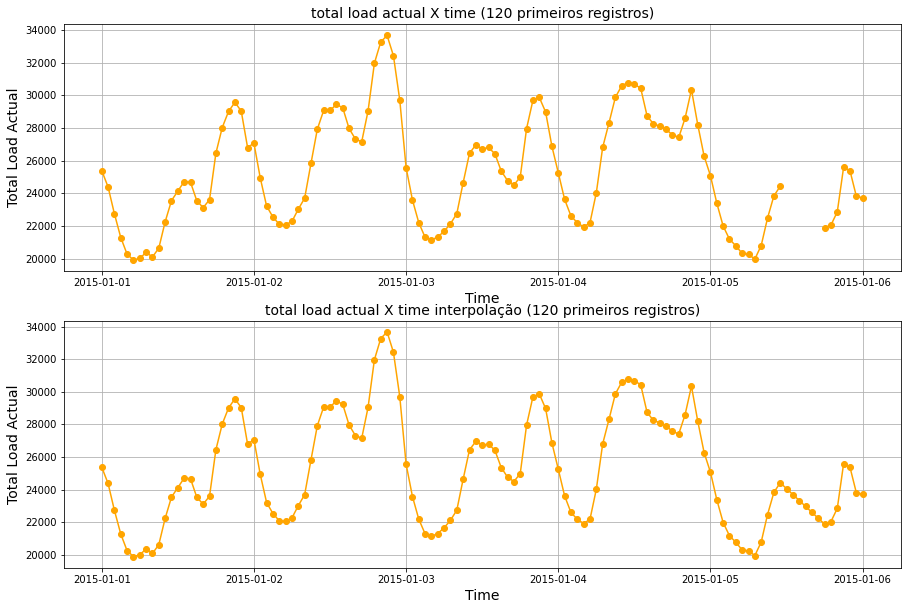

In [ ]:
fig = plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(df_nulos_0['time'],df_nulos_0['total load actual'], color='orange', marker='o')
plt.title('total load actual X time (120 primeiros registros)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Total Load Actual', fontsize=14)
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(df_int_0['time'],df_int_0['total load actual'], color='orange', marker='o')
plt.title('total load actual X time interpolação (120 primeiros registros)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Total Load Actual', fontsize=14)
plt.grid(True)

plt.show()

# Comparando interpolação de 80 a 120 registros

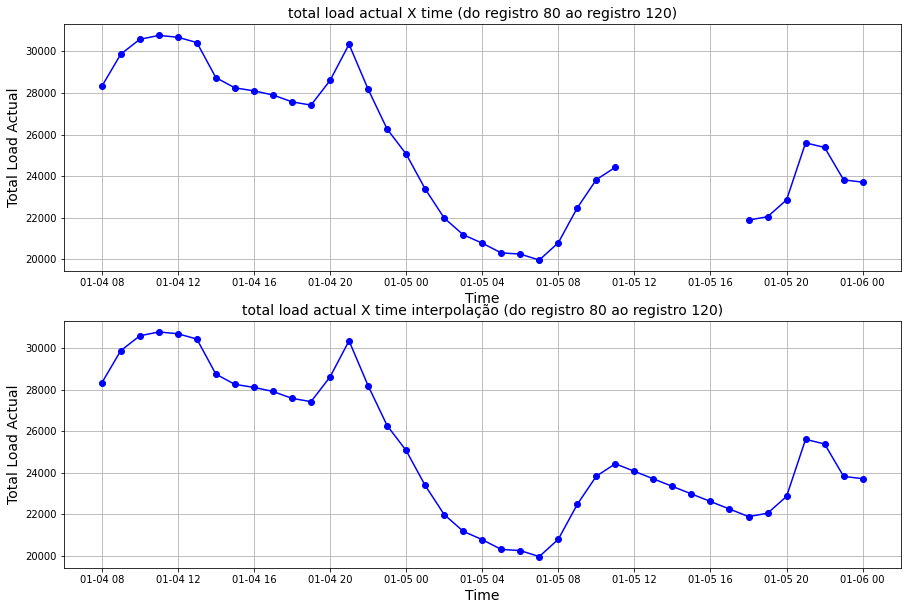

In [ ]:
fig = plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(df_nulos_1['time'],df_nulos_1['total load actual'], color='blue', marker='o')
plt.title('total load actual X time (do registro 80 ao registro 120)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Total Load Actual', fontsize=14)
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(df_int_1['time'],df_int_1['total load actual'], color='blue', marker='o')
plt.title('total load actual X time interpolação (do registro 80 ao registro 120)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Total Load Actual', fontsize=14)
plt.grid(True)

plt.show()

# Comparando interpolação de 650 a 750 registro

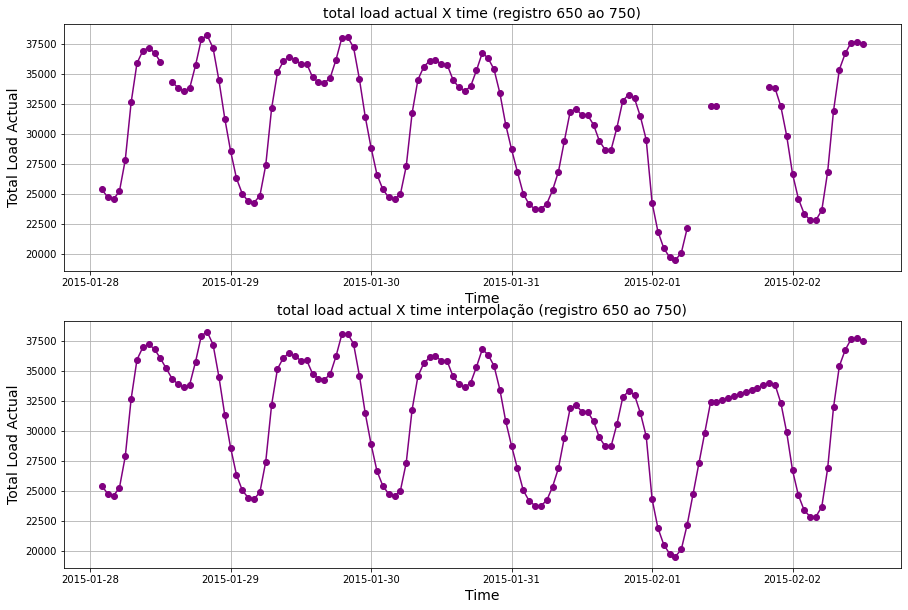

In [ ]:
fig = plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(df_nulos_2['time'],df_nulos_2['total load actual'], color='purple', marker='o')
plt.title('total load actual X time (registro 650 ao 750)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Total Load Actual', fontsize=14)
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(df_int_2['time'],df_int_2['total load actual'], color='purple', marker='o')
plt.title('total load actual X time interpolação (registro 650 ao 750)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Total Load Actual', fontsize=14)
plt.grid(True)

plt.show()

In [ ]:
#sobreescrevendo a base de dados de energia
df_energia=df_energia_interpolacao

# Carregar dados Clima

In [ ]:
df_clima = pd.read_csv("weather_features.csv")
df_clima.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


**Informações Dataframe:**
<br>
Dataframe contendo informações sobre o cima em 5 cidades distintas da Espanha: Valencia, Madrid, Bilbao, Barcelona, Seville
<br>
<br>
**Colunas:**
<br>
<br>
**dt_iso** = Coluna de "Timestamp" contendo a data e a hora do período observado
<br>
<br>
**city_name** = Nome de cada ciadade (Valencia, Madrid, Bilbao, Barcelona, Seville)
<br>
<br>
**temp** = Temperatura (Kelvin)
<br>
<br>
**temp_min** = Temperatura mínima (Kelvin)
<br>
<br>
**temp_max** = Temperatura máxima (Kelvin)
<br>
<br>
**pressure** = Pressão (hectopascal - hPa)
<br>
<br>
**humidity** = Umidade
<br>
<br>
**wind_speed** = Velocidade do Vento (m/s)
<br>
<br>
**wind_deg** = "Wind Degrees" (direção do vento)
<br>
<br>
**rain_1h** = mm de chuva em 1 hora
<br>
<br>
**rain_3h** = mm de chuva em 3 horas
<br>
<br>
**snow_3h** = precipitação de neve em 3 horas
<br>
<br>
**clouds_all** = ??
<br>
<br>
**weather_id** = Código do clima
<br>
<br>
**weather_main** = descrição simples do clima
<br>
<br>
**weather_description** = descrição detalhada do clima
<br>
<br>
**weather_icon** = ícone do clima (possivelmnete extraido do sistema)
<br>
<br>
**Observações:**
<br>
<br>
1) A coluna **weather_icon** pode ser descartada.
<br>
<br>
2) As colunas **weather_id**, **weather_main** e **weather_description**, aparentemente possuem a mesma informação.
<br>
<br>
**Dúvida:**
<br>
se a coluana "rain_3h" mostra a quantidade de chuva em milimetros que caiu em um período de 3 horas... e coluna "rain_1h" mostra a mesma informação em um período de 1 hora... (as informaçeõs são redundantes não? [como se fosse o mesmo problema das colunas weather_id, weather_main e weather_description)) como eu verifico isso? Digo como eu verifico se a informação é redundante... (dá um merge com a "target variable" e verifica a correlação? Além disso mais a diante quando é realziado um ".describe()" desse datraframe, a média de rain_3h deveria ser maior do que rain_1h... mas isso não acontece (a media de rain 1h é maior do que rain 3h... oq eu não faz sentido...)... não sei se foi um problema no tratamento ou a informação está "ruim"? Eu nãi sei muito o qe fazer com rain 1h e rain 3h e nem sei se essa foi a melhor abordagem para as colunas weather_id, weather_main e weather_description.



## Descartando a coluna "weather_icon":

In [ ]:
df_clima = df_clima.drop(['weather_icon'], axis=1)
df_clima.head(1)

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear


## Anásie das colunas weather_id, weather_main e weather_description:

### weather_id
Contém uma numeração com o id do clima.

In [ ]:
df_clima['weather_id'].unique() #registros únicos na coluna weather_id

array([800, 801, 802, 803, 804, 500, 501, 502, 701, 522, 521, 503, 202,
       200, 201, 211, 520, 300, 741, 301, 711, 302, 721, 310, 600, 616,
       615, 601, 210, 602, 611, 311, 612, 620, 531, 731, 761, 771])

In [ ]:
len(df_clima['weather_id'].unique()) # quantida de de registros únicos na coluna weather_id


38

### weather_main
Contém uma descrição simples do clima.

In [ ]:
df_clima['weather_main'].unique() #registros únicos na coluna weather_main

array(['clear', 'clouds', 'rain', 'mist', 'thunderstorm', 'drizzle',
       'fog', 'smoke', 'haze', 'snow', 'dust', 'squall'], dtype=object)

In [ ]:
len(df_clima['weather_main'].unique()) # quantida de de registros únicos na coluna weather_main

12

###weather_description
Contém uma descrição detalhada do clima.

In [ ]:
df_clima['weather_description'].unique() #registros únicos na coluna weather_description

array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'light rain', 'moderate rain',
       'heavy intensity rain', 'mist', 'heavy intensity shower rain',
       'shower rain', 'very heavy rain', 'thunderstorm with heavy rain',
       'thunderstorm with light rain', 'thunderstorm with rain',
       'proximity thunderstorm', 'thunderstorm',
       'light intensity shower rain', 'light intensity drizzle', 'fog',
       'drizzle', 'smoke', 'heavy intensity drizzle', 'haze',
       'proximity shower rain', 'light intensity drizzle rain',
       'light snow', 'rain and snow', 'light rain and snow', 'snow',
       'light thunderstorm', 'heavy snow', 'sleet', 'rain and drizzle',
       'shower sleet', 'light shower sleet', 'light shower snow',
       'proximity moderate rain', 'ragged shower rain',
       'sand dust whirls', 'proximity drizzle', 'dust', 'squalls'],
      dtype=object)

In [ ]:
len(df_clima['weather_description'].unique()) #registros únicos na coluna weather_description

43

**Conclusão**:
<br>
Retirar a coluna **"weather_main"** pois ela representa uma descrição menos "detalhada" em relação ao clima (apresenta 12 registros únicos)
<br>
<br>
Manter a coluna **weather_id** e realziar o one-hot-encoding da coluna **weather_description** pois esta coluna apresenta uma descrição mais tetalhada do clima (43 registros únicos) do que a coluna **"weather_main"**
<br>
<br>
Depois será comparada a **correlação** das colunas **weather_id** e **weather_description** com a variável resposta **"price actual"** (após a realziação do **"merge"** das bases de dados) para saber se estas colunas apresentam informações redundantes.


In [ ]:
df_clima = df_clima.drop(['weather_main'], axis=1) # removendo a coluna #weather_main
df_clima.head(1)

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_description
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,sky is clear


In [ ]:
one_hot = pd.get_dummies(df_clima['weather_description']) # realizar one hot encoding para a coluna weather_description
df_clima = df_clima.drop('weather_description',axis = 1) # remover a coluna weather_description do dataframe
df_clima = df_clima.join(one_hot) # Realziar o join do "one_hot" com o dataframe
df_clima.head(1)

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,broken clouds,drizzle,dust,few clouds,fog,haze,heavy intensity drizzle,heavy intensity rain,heavy intensity shower rain,heavy snow,light intensity drizzle,light intensity drizzle rain,light intensity shower rain,light rain,light rain and snow,light shower sleet,light shower snow,light snow,light thunderstorm,mist,moderate rain,overcast clouds,proximity drizzle,proximity moderate rain,proximity shower rain,proximity thunderstorm,ragged shower rain,rain and drizzle,rain and snow,sand dust whirls,scattered clouds,shower rain,shower sleet,sky is clear,sleet,smoke,snow,squalls,thunderstorm,thunderstorm with heavy rain,thunderstorm with light rain,thunderstorm with rain,very heavy rain
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Linhas e Colunas
df_clima.shape

(178396, 57)

## Verificar o tipo dos dados:

In [ ]:
# Tipo de dados
df_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 57 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   dt_iso                        178396 non-null  object 
 1   city_name                     178396 non-null  object 
 2   temp                          178396 non-null  float64
 3   temp_min                      178396 non-null  float64
 4   temp_max                      178396 non-null  float64
 5   pressure                      178396 non-null  int64  
 6   humidity                      178396 non-null  int64  
 7   wind_speed                    178396 non-null  int64  
 8   wind_deg                      178396 non-null  int64  
 9   rain_1h                       178396 non-null  float64
 10  rain_3h                       178396 non-null  float64
 11  snow_3h                       178396 non-null  float64
 12  clouds_all                    178396 non-nul

### Mudar o tipo dos dados:
será necessário mudar o tipo dos dados de int64 (número inteiro) para float64 (número decimal)

In [ ]:
# Mudar o tipo das colunas do dataframe de int64 para float64
colunas = df_clima.select_dtypes(include=[np.int64]).columns #Seleciona as colunas que são do tipo int64

for coluna in colunas:
  df_clima[coluna] = df_clima[coluna].values.astype(np.float64) # Loop que converte a ista de colunas a cima de int64 para float 64

df_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 57 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   dt_iso                        178396 non-null  object 
 1   city_name                     178396 non-null  object 
 2   temp                          178396 non-null  float64
 3   temp_min                      178396 non-null  float64
 4   temp_max                      178396 non-null  float64
 5   pressure                      178396 non-null  float64
 6   humidity                      178396 non-null  float64
 7   wind_speed                    178396 non-null  float64
 8   wind_deg                      178396 non-null  float64
 9   rain_1h                       178396 non-null  float64
 10  rain_3h                       178396 non-null  float64
 11  snow_3h                       178396 non-null  float64
 12  clouds_all                    178396 non-nul

## Verificar Duplicados:

In [ ]:
sum(df_clima.duplicated())

21

In [ ]:
df_valencia = df_clima[df_clima['city_name']=="Valencia"] # Seleciona só os registros com o valor de "Valencia" na coluna 'city_name'
df_valencia_duplicado = df_valencia[df_valencia.duplicated()] # Selecioan somente os valores duplicados do dataframe acima
df_valencia_duplicado

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,broken clouds,drizzle,dust,few clouds,fog,haze,heavy intensity drizzle,heavy intensity rain,heavy intensity shower rain,heavy snow,light intensity drizzle,light intensity drizzle rain,light intensity shower rain,light rain,light rain and snow,light shower sleet,light shower snow,light snow,light thunderstorm,mist,moderate rain,overcast clouds,proximity drizzle,proximity moderate rain,proximity shower rain,proximity thunderstorm,ragged shower rain,rain and drizzle,rain and snow,sand dust whirls,scattered clouds,shower rain,shower sleet,sky is clear,sleet,smoke,snow,squalls,thunderstorm,thunderstorm with heavy rain,thunderstorm with light rain,thunderstorm with rain,very heavy rain
125,2015-01-06 04:00:00+01:00,Valencia,273.142,273.142,273.142,995.0,86.0,1.0,265.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6566,2015-10-01 02:00:00+02:00,Valencia,289.740,286.480,292.040,1021.0,88.0,0.0,0.0,0.0,0.0,0.0,40.0,802.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
15345,2016-09-30 02:00:00+02:00,Valencia,288.060,285.370,291.250,1021.0,86.0,1.0,45.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
24135,2017-09-30 02:00:00+02:00,Valencia,292.150,292.150,292.150,1021.0,82.0,0.0,0.0,0.0,0.0,0.0,20.0,801.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32900,2018-09-30 02:00:00+02:00,Valencia,292.150,292.150,292.150,1017.0,82.0,2.0,320.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Aparentemente os valores duplicados são colunas que contém o mesmo valor. Como existem 5 cidades distintas e que as observações são realizadas de hora em hora, será necessário garantir que **não existe um registro duplicado, ou seja, um registro contendo um valor duplicado para uma mesma cidade em um mesmo horário.**
<br>
<br>
O método **".duplicated()"** está mostrando somente os registros duplicados em relação aos valores. Para verificar se existe um valor duplicado para uma mesma cidade em um mesmo horário, será necessário definir a coluna **"dt_iso"** como a coluna de índice do dataframe (garantir que não existe horários repetiods), depois agrupar os registros por cidade e depois comparar a quantidade desses registros com o "df_energia"
<br>
<br>
Primeiramente, para avaliar registros duplicados, vamos transformar a coluna "dt_iso", que contem o tempo de observação no índice do dataframe:

In [ ]:
df_clima['time'] = pd.to_datetime(df_clima['dt_iso'], utc=True, infer_datetime_format=True) #Cria uma coluna "time" com a informação da coluna "dt_iso" no formato de timestamp
df_clima = df_clima.drop(['dt_iso'], axis=1) # apaga a coluna "dt_iso" do dataframe (ela não é mais necessária)
df_clima = df_clima.set_index('time') #tranforma a coluna "time" para o indice do dataframe
df_clima.head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,broken clouds,drizzle,dust,few clouds,fog,haze,heavy intensity drizzle,heavy intensity rain,heavy intensity shower rain,heavy snow,light intensity drizzle,light intensity drizzle rain,light intensity shower rain,light rain,light rain and snow,light shower sleet,light shower snow,light snow,light thunderstorm,mist,moderate rain,overcast clouds,proximity drizzle,proximity moderate rain,proximity shower rain,proximity thunderstorm,ragged shower rain,rain and drizzle,rain and snow,sand dust whirls,scattered clouds,shower rain,shower sleet,sky is clear,sleet,smoke,snow,squalls,thunderstorm,thunderstorm with heavy rain,thunderstorm with light rain,thunderstorm with rain,very heavy rain
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2015-01-01 00:00:00+00:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2015-01-01 01:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2015-01-01 02:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2015-01-01 03:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Será necessário agrupar, (utilziando o método **".groupby()"** o dataframe por cidade e ver se os registros batem com a quantidade de registros presentes na base de dados de energia (**"df_energia"**).
<br>
<br>
Ou seja, a quantidade de registros da base de dados de energia deverá ser a mesma quantidade  presente em cada cidade separadamente, caso a quantidade de registros presentes em cada cidade individualmente seja maior do que a quantidade de registros presentes no "df_energia", isto indica registros duplicados.

In [ ]:
print('Registros "df_energia": {}\n'.format(df_energia.shape[0])) # printa  aquantidade de registros na base de dados "df_energia"

cidades = df_clima['city_name'].unique() # cria uma lista com o nome das 5 cidades tendo como base "df_clima"
clima_groupby = df_clima.groupby('city_name') # agrupa os registros do "df_clima" por cidade

for cidade in cidades:
    print('Cidade: {}\n'.format(cidade), #printa o  nome da cidade em que estamos realziando a coontafgem de registro,
          '  Registros: {}\n'.format(clima_groupby.get_group('{}'.format(cidade)).shape[0]), #Printa a quantidade de registrospresente na base "cila_groupby" [lembando que é uma base de dados agrupada por cidade então vai printar o número de registros por cidade]
          '  Há possíveis registros duplicados? {}\n'.format(not df_energia.shape[0]==clima_groupby.get_group('{}'.format(cidade)).shape[0]), # compara para ver se a quantidade  de registros presentes no "df_energia" é igual a quantidade  de registros presentes por cidade. Se for igual, ele rotorna "False", ou seja, não há registros duplicados, se for diferente ele reforna "True", ou seja, há possíbeus registros duplicados, ou seja, euma mesma cidade em um mesmo horário apresenta valores duplicados
          '  Análise Válida? {}\n'.format(df_energia.shape[0]<=clima_groupby.get_group('{}'.format(cidade)).shape[0])) # Ferifica se os registros das cidades são menores do que a quantidade de registros no "df_energia" se for menor, indica que há menos registros para essa cidade do que no número de observações em "df_energia", o que invalidaria completamente esta análise...


Registros "df_energia": 35064

Cidade: Valencia
   Registros: 35145
   Há possíveis registros duplicados? True
   Análise Válida? True

Cidade: Madrid
   Registros: 36267
   Há possíveis registros duplicados? True
   Análise Válida? True

Cidade: Bilbao
   Registros: 35951
   Há possíveis registros duplicados? True
   Análise Válida? True

Cidade:  Barcelona
   Registros: 35476
   Há possíveis registros duplicados? True
   Análise Válida? True

Cidade: Seville
   Registros: 35557
   Há possíveis registros duplicados? True
   Análise Válida? True



**Análise:**
<br>
Para todas as cidades, a quantidade de registros é maior do que a quantidade presente no "df_energia", o que indica que pode haver registros duplicados em todas as cidades.
<br>
<br>
Para eliminar as duplicadas, será necessário resetar o índice do dataframe, eliminar as duplicadas (deixando somente o promeiro registro para a chave composta "time" e "city_name") e colocar a coluna "time" como índice novamente.

In [ ]:
df_clima = df_clima.reset_index().drop_duplicates(subset=['time','city_name'], keep='first').set_index('time') # Resetar o índice, remover duplicadas pela chave composta "time" e "city name", deixar o índice como "time"
df_clima.head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,broken clouds,drizzle,dust,few clouds,fog,haze,heavy intensity drizzle,heavy intensity rain,heavy intensity shower rain,heavy snow,light intensity drizzle,light intensity drizzle rain,light intensity shower rain,light rain,light rain and snow,light shower sleet,light shower snow,light snow,light thunderstorm,mist,moderate rain,overcast clouds,proximity drizzle,proximity moderate rain,proximity shower rain,proximity thunderstorm,ragged shower rain,rain and drizzle,rain and snow,sand dust whirls,scattered clouds,shower rain,shower sleet,sky is clear,sleet,smoke,snow,squalls,thunderstorm,thunderstorm with heavy rain,thunderstorm with light rain,thunderstorm with rain,very heavy rain
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2015-01-01 00:00:00+00:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2015-01-01 01:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2015-01-01 02:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2015-01-01 03:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Validando duplicadas novamente:

In [ ]:
print('Registros "df_energia": {}\n'.format(df_energia.shape[0])) # printa  aquantidade de registros na base de dados "df_energia"

cidades = df_clima['city_name'].unique() # cria uma lista com o nome das 5 cidades tendo como base "df_clima"
clima_groupby = df_clima.groupby('city_name') # agrupa os registros do "df_clima" por cidade

for cidade in cidades:
    print('Cidade: {}\n'.format(cidade), #printa o  nome da cidade em que estamos realziando a coontafgem de registro,
          '  Registros: {}\n'.format(clima_groupby.get_group('{}'.format(cidade)).shape[0]), #Printa a quantidade de registrospresente na base "cila_groupby" [lembando que é uma base de dados agrupada por cidade então vai printar o número de registros por cidade]
          '  Há possíveis registros duplicados? {}\n'.format(not df_energia.shape[0]==clima_groupby.get_group('{}'.format(cidade)).shape[0]), # compara para ver se a quantidade  de registros presentes no "df_energia" é igual a quantidade  de registros presentes por cidade. Se for igual, ele rotorna "False", ou seja, não há registros duplicados, se for diferente ele reforna "True", ou seja, há possíbeus registros duplicados, ou seja, euma mesma cidade em um mesmo horário apresenta valores duplicados
          '  Análise Válida? {}\n'.format(df_energia.shape[0]<=clima_groupby.get_group('{}'.format(cidade)).shape[0])) # Ferifica se os registros das cidades são menores do que a quantidade de registros no "df_energia" se for menor, indica que há menos registros para essa cidade do que no número de observações em "df_energia", o que invalidaria completamente esta análise...


Registros "df_energia": 35064

Cidade: Valencia
   Registros: 35064
   Há possíveis registros duplicados? False
   Análise Válida? True

Cidade: Madrid
   Registros: 35064
   Há possíveis registros duplicados? False
   Análise Válida? True

Cidade: Bilbao
   Registros: 35064
   Há possíveis registros duplicados? False
   Análise Válida? True

Cidade:  Barcelona
   Registros: 35064
   Há possíveis registros duplicados? False
   Análise Válida? True

Cidade: Seville
   Registros: 35064
   Há possíveis registros duplicados? False
   Análise Válida? True



**Análise:**
<br>
Aparentemente, o problema de registros duplicados foi solucionado.

## Estatísticas Básicas:

In [ ]:
df_clima.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,broken clouds,drizzle,dust,few clouds,fog,haze,heavy intensity drizzle,heavy intensity rain,heavy intensity shower rain,heavy snow,light intensity drizzle,light intensity drizzle rain,light intensity shower rain,light rain,light rain and snow,light shower sleet,light shower snow,light snow,light thunderstorm,mist,moderate rain,overcast clouds,proximity drizzle,proximity moderate rain,proximity shower rain,proximity thunderstorm,ragged shower rain,rain and drizzle,rain and snow,sand dust whirls,scattered clouds,shower rain,shower sleet,sky is clear,sleet,smoke,snow,squalls,thunderstorm,thunderstorm with heavy rain,thunderstorm with light rain,thunderstorm with rain,very heavy rain
count,175320.000000,175320.000000,175320.000000,1.753200e+05,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.0,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.0,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000
mean,289.707651,288.428433,291.172255,1.070199e+03,68.032307,2.470009,166.724909,0.069308,0.000386,0.004846,24.344057,763.452390,0.099515,0.001295,0.001768,0.183088,0.010946,0.002247,0.000063,0.006497,0.000411,0.000011,0.004940,0.000308,0.003240,0.060216,0.000086,0.0,0.000006,0.000582,0.000006,0.017454,0.020249,0.014608,0.000011,0.000023,0.002453,0.002048,0.000006,0.000086,0.000034,0.000011,0.090937,0.002099,0.0,0.471538,0.000017,0.000188,0.000200,0.000006,0.001306,0.000143,0.000416,0.000502,0.000445
std,8.024910,7.948249,8.613916,6.021769e+03,21.838097,2.095140,116.548788,0.385915,0.007348,0.224547,30.339522,103.125539,0.299353,0.035960,0.042013,0.386740,0.104048,0.047353,0.007921,0.080340,0.020261,0.003378,0.070108,0.017548,0.056827,0.237887,0.009249,0.0,0.002388,0.024113,0.002388,0.130955,0.140850,0.119976,0.003378,0.004777,0.049464,0.045205,0.002388,0.009249,0.005850,0.003378,0.287520,0.045767,0.0,0.499191,0.004137,0.013718,0.014128,0.002388,0.036118,0.011941,0.020401,0.022398,0.021088
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,283.830000,282.784586,284.909258,1.013000e+03,53.000000,1.000000,56.000000,0.000000,0.000000,0.000000,0.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.000000,178.000000,0.000000,0.000000,0.000000,16.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000

**Conclusões:**
<br>
<br>
Dúvida:
<br>
se a coluana "rain_3h" mostra a quantidade de chuva em milimetros que caiu em um período de 3 horas... e coluna "rain_1h" mostra a mesma informação em um período de 1 hora... (as informaç~eos são redundantes? como eu verifico isso... além do mais a média de rain_3h deveria ser maior do que rain_1h não? ou talvez seja menor pois a quantidade de chuva que cai durante 3horas vai ser reduzindo [isso não faria sentido... o que eu devo fazer com essa coluna qual das duas eu devo uasar?)


# Registros Nulos:

In [ ]:
df_clima.isnull().sum()

city_name                       0
temp                            0
temp_min                        0
temp_max                        0
pressure                        0
humidity                        0
wind_speed                      0
wind_deg                        0
rain_1h                         0
rain_3h                         0
snow_3h                         0
clouds_all                      0
weather_id                      0
broken clouds                   0
drizzle                         0
dust                            0
few clouds                      0
fog                             0
haze                            0
heavy intensity drizzle         0
heavy intensity rain            0
heavy intensity shower rain     0
heavy snow                      0
light intensity drizzle         0
light intensity drizzle rain    0
light intensity shower rain     0
light rain                      0
light rain and snow             0
light shower sleet              0
light shower s

# Juntando os dataframes:

Ajustando o texto de **Barcelona**. Barcelona está com um espaço antes e será ajustado de **" Barcelona"** para **"Barcelona"**.

In [ ]:
# Ajustando texto de "Barcelona"
df_clima['city_name'] = df_clima['city_name'].str.replace(" Barcelona","Barcelona")

### Ajustando a coluna Time
A coluna "time" não foi formatada para o tipo de data corretamente.
<br>
Será necessário realizar a conversão com o trecho de código abaixo:

In [ ]:
# A coluna "time" não foi formatada para o tipo de data corretamente.
# Será necessário realizar a conversão com o trecho de código abaixo
df_energia['time'] = pd.to_datetime(df_energia['time'],
                                    utc=True,
                                    infer_datetime_format=True)

df_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35064 non-null  float64            
 2   generation fossil brown coal/lignite         35064 non-null  float64            
 3   generation fossil gas                        35064 non-null  float64            
 4   generation fossil hard coal                  35064 non-null  float64            
 5   generation fossil oil                        35064 non-null  float64            
 6   generation hydro pumped storage consumption  35064 non-null  float64            
 7   generation hydro run-of-river and poundage   35064 non-null  float64            
 8   generation hydro water res

Criando um dataframe para cada cidade

In [ ]:
df_valencia = df_clima[df_clima['city_name']=="Valencia"]
df_madrid = df_clima[df_clima['city_name']=="Madrid"]
df_bilbao = df_clima[df_clima['city_name']=="Bilbao"]
df_barcelona = df_clima[df_clima['city_name']=="Barcelona"]
df_seville = df_clima[df_clima['city_name']=="Seville"]

In [ ]:
# coloca um sufixo no nome de cada coluna de cada cidade
#sufixo =  armazena o nome da respectiva cidade presente nos dataframes nesta variável. Observação, o texto vem excrito ['Seville'] então a string foi manipulada para remover ops caracteres indesejáveis: ' ; [ ; ]

sufixo = str(df_valencia['city_name'].unique()).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
df_valencia = df_valencia.add_suffix('_{}'.format(sufixo))

sufixo = str(df_madrid['city_name'].unique()).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
df_madrid = df_madrid.add_suffix('_{}'.format(sufixo))

sufixo = str(df_bilbao['city_name'].unique()).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
df_bilbao = df_bilbao.add_suffix('_{}'.format(sufixo))

sufixo = str(df_barcelona['city_name'].unique()).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
df_barcelona = df_barcelona.add_suffix('_{}'.format(sufixo))

sufixo = str(df_seville['city_name'].unique()).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
df_seville = df_seville.add_suffix('_{}'.format(sufixo))

# faz uma cópia do df energia em uma variável chamada df_final'
df_final = df_energia

# Colocando os dataframes em uma lista para a realização do "Merge":
dfs_merge = [df_valencia, df_madrid, df_bilbao, df_barcelona, df_seville]


#realzia o merge dos dataframes de cada  cidade com o df energia
for df in dfs_merge:
  df_final = df_final.merge(df, on=['time'], how='outer')


# remove nome das colunas com city_name_nome da cidade:
df_final = df_final.drop(['city_name_Valencia','city_name_Madrid','city_name_Bilbao','city_name_Barcelona','city_name_Seville'], axis=1)

df_final


,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,rain_3h_Valencia,snow_3h_Valencia,clouds_all_Valencia,weather_id_Valencia,broken clouds_Valencia,drizzle_Valencia,dust_Valencia,few clouds_Valencia,fog_Valencia,haze_Valencia,heavy intensity drizzle_Valencia,heavy intensity rain_Valencia,heavy intensity shower rain_Valencia,heavy snow_Valencia,...,few clouds_Seville,fog_Seville,haze_Seville,heavy intensity drizzle_Seville,heavy intensity rain_Seville,heavy intensity shower rain_Seville,heavy snow_Seville,light intensity drizzle_Seville,light intensity drizzle rain_Seville,light intensity shower rain_Seville,light rain_Seville,light rain and snow_Seville,light shower sleet_Seville,light shower snow_Seville,light snow_Seville,light thunderstorm_Seville,mist_Seville,moderate rain_Seville,overcast clouds_Seville,proximity drizzle_Seville,proximity moderate rain_Seville,proximity shower rain_Seville,proximity thunderstorm_Seville,ragged shower rain_Seville,rain and drizzle_Seville,rain and snow_Seville,sand dust whirls_Seville,scattered clouds_Seville,shower rain_Seville,shower sleet_Seville,sky is clear_Seville,sleet_Seville,smoke_Seville,snow_Seville,squalls_Seville,thunderstorm_Seville,thunderstorm with heavy rain_Seville,thunderstorm with light rain_Seville,thunderstorm with rain_Seville,very heavy rain_Seville
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,50.10,65.41,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,48.10,64.92,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,47.33,64.48,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,42.27,59.32,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,38.41,56.04,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0,68.85,77.02,285.640,285.150,286.150,1028.0,62.0,2.0,140.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

**Melhorando o processo acima em um loop (deixa menos código) o processo é o mesmo do que  foi descrito acima, avaliar se pode "apagar" o trecho acima ou deixa o decima como um comentário/comentar melhor**

In [ ]:
#Melhorando o processo acima em um loop (deixa menos código) o processo é o mesmo do que  foi descrito acima,
#avaliar se pode "apagar" o trecho acima ou deixa o decima como um comentário/comentar melhor

# faz uma cópia do df energia em uma variável chamada df_final'
df_final = df_energia

# Colocando os dataframes em uma lista para a realização do "Merge":
dfs_merge = [df_valencia, df_madrid, df_bilbao, df_barcelona, df_seville]

for df in dfs_merge:
    # coloca um sufixo no nome de cada coluna de cada cidade (armazena o nome da respectiva cidade presente nos dataframes nesta variável. Observação, o texto vem excrito ['Seville'] então a string foi manipulada para remover ops caracteres indesejáveis: ' ; [ ; ])
    texto_cidade = str(df['city_name'].unique()).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
    # Adiciona um "sufixo" em todas as colunas do dataframe com o texto da cidade acima. Por exemplo: coluna original: "city_name" coluna com o sufixo: "city_name_Seville", desta maneira será possível identificar os dados referentes a cada cidade após a realização do merge
    df = df.add_suffix('_{}'.format(texto_cidade))
    # realzia o merge dos dataframes de cada  cidade com o df energia
    df_final = df_final.merge(df, on=['time'], how='outer')
    # remove nome das colunas com city_name_nome da cidade:
    df_final = df_final.drop('city_name_{}'.format(texto_cidade), axis=1) # retira a coluna "city_name" com o respectivo sufixo do nome da cidade (não é uma coluna que agrega informação)
    


df_final

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,rain_3h_Valencia,snow_3h_Valencia,clouds_all_Valencia,weather_id_Valencia,broken clouds_Valencia,drizzle_Valencia,dust_Valencia,few clouds_Valencia,fog_Valencia,haze_Valencia,heavy intensity drizzle_Valencia,heavy intensity rain_Valencia,heavy intensity shower rain_Valencia,heavy snow_Valencia,...,few clouds_Seville,fog_Seville,haze_Seville,heavy intensity drizzle_Seville,heavy intensity rain_Seville,heavy intensity shower rain_Seville,heavy snow_Seville,light intensity drizzle_Seville,light intensity drizzle rain_Seville,light intensity shower rain_Seville,light rain_Seville,light rain and snow_Seville,light shower sleet_Seville,light shower snow_Seville,light snow_Seville,light thunderstorm_Seville,mist_Seville,moderate rain_Seville,overcast clouds_Seville,proximity drizzle_Seville,proximity moderate rain_Seville,proximity shower rain_Seville,proximity thunderstorm_Seville,ragged shower rain_Seville,rain and drizzle_Seville,rain and snow_Seville,sand dust whirls_Seville,scattered clouds_Seville,shower rain_Seville,shower sleet_Seville,sky is clear_Seville,sleet_Seville,smoke_Seville,snow_Seville,squalls_Seville,thunderstorm_Seville,thunderstorm with heavy rain_Seville,thunderstorm with light rain_Seville,thunderstorm with rain_Seville,very heavy rain_Seville
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,50.10,65.41,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,48.10,64.92,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,47.33,64.48,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,42.27,59.32,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,38.41,56.04,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0,68.85,77.02,285.640,285.150,286.150,1028.0,62.0,2.0,140.0,0.0,0.0,0.0,0.0,800.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [ ]:
df_final.shape

(35064, 293)

# Dúvidas:
<br>
1) Base de energia - Interpolação, o terceiro gráfico não ficou tão "bom", era para fazer ma forma de um "M", mas ele praticamente fez uma reta... Existe outra forma de interpolar?
<br>
<br>
2) Base de clima - weather_id, weather_main e weather_description, como escolher a melhor fariável. Eu devo fazer one-hot-encoding? Ou não? Posso ficar só com o weather ID?
<br>
<br>
3) Blase clima -"rain_3h" e "rain_1h" as informaçeõs são redundantes como verificar qual coluna devo usar? Quando é realziado um ".describe()" desse datraframe, a média de rain_3h deveria ser maior do que rain_1h... mas isso não acontece (a media de rain 1h é maior do que rain 3h... oque não faz sentido...)... não sei se foi um problema no tratamento ou a informação está "ruim"?
<br>
<br>
4) Agora que eu tenho os dataframes juntos (com o merge), como eu verifico quais informações utilizar? quais teste devo fazer? Verificar correlação? Existe algum outro teste estatístico?


#Anotações/teste de Códigos:
<br>
ignorar

In [ ]:
sum(df_clima.duplicated())

9899

sum(df_clima.duplicated())

In [ ]:
clima_groupby.head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
time,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,Valencia,270.475000,270.475000,270.475000,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 00:00:00+00:00,Valencia,270.475000,270.475000,270.475000,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 01:00:00+00:00,Valencia,269.686000,269.686000,269.686000,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 02:00:00+00:00,Valencia,269.686000,269.686000,269.686000,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 03:00:00+00:00,Valencia,269.686000,269.686000,269.686000,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2014-12-31 23:00:00+00:00,Madrid,267.325000,267.325000,267.325000,971.0,63.0,1.0,309.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 00:00:00+00:00,Madrid,267.325000,267.325000,267.325000,971.0,63.0,1.0,309.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 01:00:00+00:00,Madrid,266.186000,266.186000,266.186000,971.0,64.0,1.0,273.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 02:00:00+00:00,Madrid,266.186000,266.186000,266.186000,971.0,64.0,1.0,273.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n


In [ ]:
df_valencia = df_clima[df_clima['city_name']=="Valencia"] # Seleciona só os registros com o valor de "Valencia" na coluna 'city_name'
df_valencia_duplicado = df_valencia[df_valencia.duplicated()] # Selecioan somente os valores duplicados do dataframe acima
df_valencia_duplicado

df_valencia_duplicado[df_valencia_duplicado['temp']==270.475000]

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
time,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n


In [ ]:
a

NameError: ignored